In [1]:
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode(connected = True)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
df = pd.read_csv("../data/Admission_Predict.csv")

# Function defined to check medata of a dataframe
def master_dataframe(dataframe):
    df_metadata = pd.DataFrame({'Datatype': dataframe.dtypes,
                                "Null Values": dataframe.isna().sum(),  
                                "Null %": round(dataframe.isna().sum()/len(dataframe)*100, 2),
                                "No: Of Unique Values": dataframe.nunique()})
    
    df_describe = dataframe.describe(include='all').T
    
    df_metadata = df_metadata.join(df_describe)  

    return df_metadata

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
master_dataframe(df)

,Datatype,Null Values,Null %,No: Of Unique Values,count,mean,std,min,25%,50%,75%,max
Serial No.,int64,0,0.0,400,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,int64,0,0.0,49,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,int64,0,0.0,29,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,int64,0,0.0,5,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,float64,0,0.0,9,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,float64,0,0.0,9,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,float64,0,0.0,168,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,int64,0,0.0,2,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,float64,0,0.0,60,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

<AxesSubplot:>

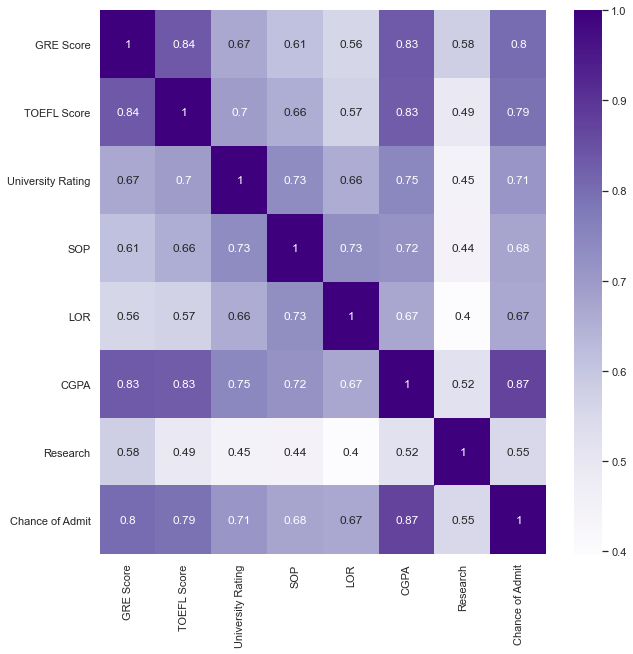

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Purples')

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'CGPA vs Chance of Admit')

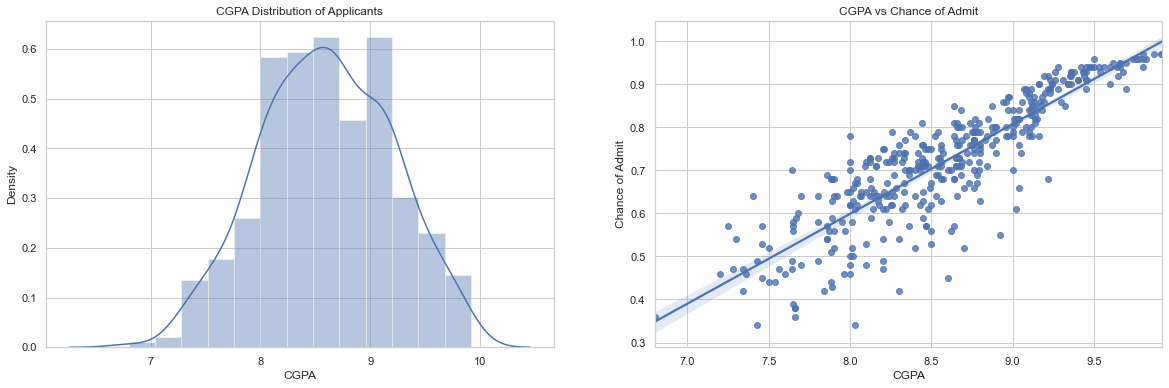

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

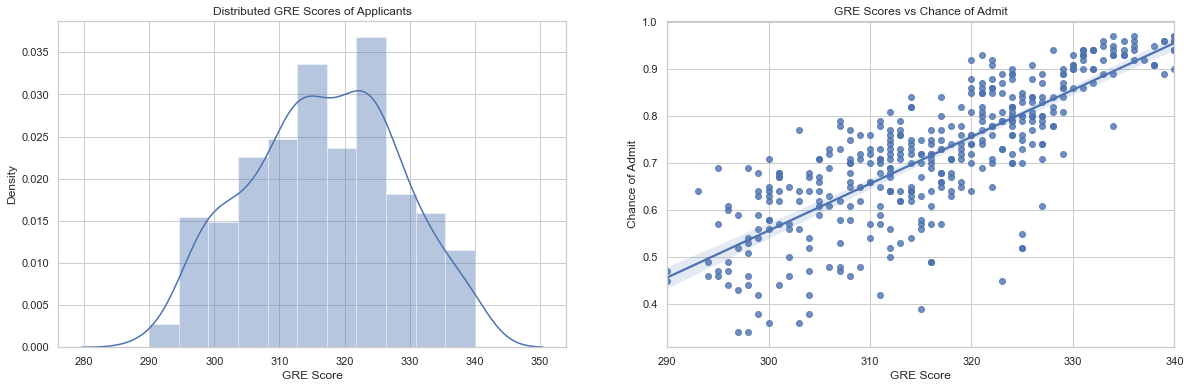

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')


c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

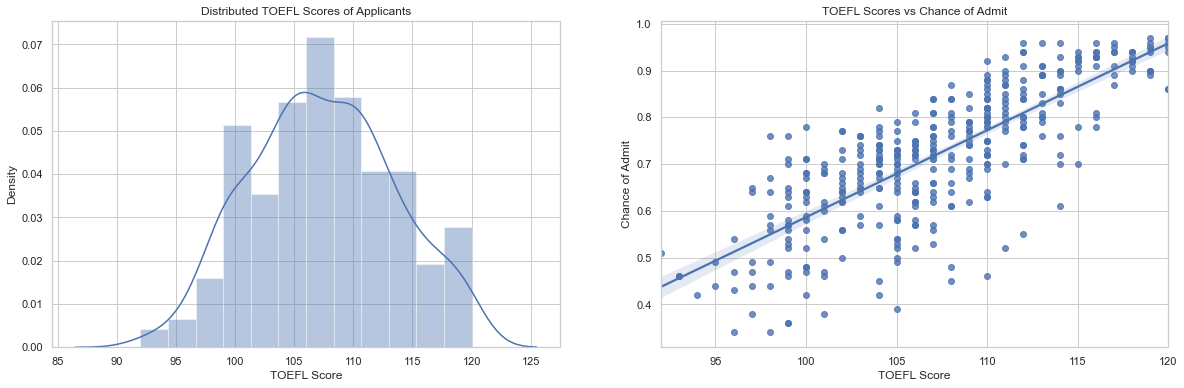

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, 'No Research Experience'), Text(1, 0, 'Has Research Experience')]

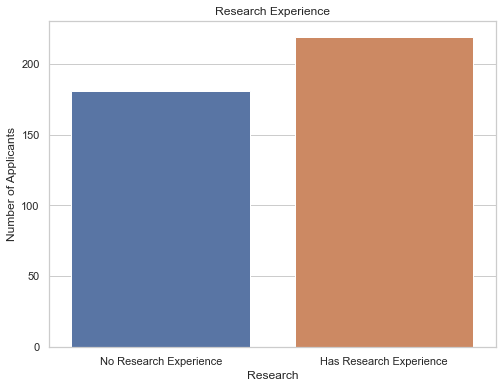

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Applicants')

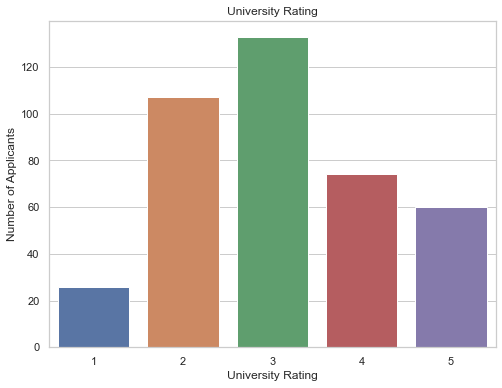

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [14]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [15]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_t=X_test
X_test = scaler.fit_transform(X_test)
X_test.shape

(80, 7)

In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

81.73867881114431

In [17]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

77.97531113163353

In [18]:
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

81.35681504113325

c:\users\risha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Accuracy')

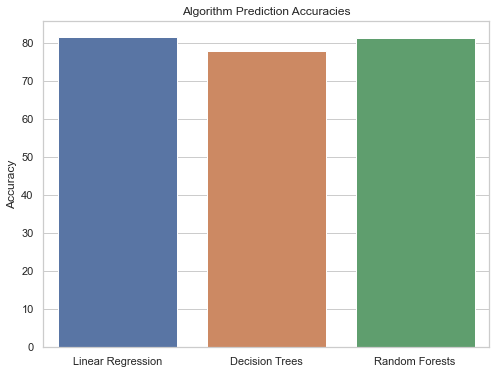

In [19]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

#Linear Regression - 81.74%
#Random Forests - 81.35%
#Decision Trees - 73.99%

In [20]:
u=pd.read_csv("../data/ranks.csv")

In [21]:
u.head()

,Rank,School name,cost
0,#1,Massachusetts Institute of Technology,4061158.0
1,#2,Stanford University,2755289.0
2,#3,University of California Berkeley,1944083.0
3,#4,California Institute of Technology,3996707.0
4,#5Tie,Carnegie Mellon University,3685437.0


In [22]:
l=u["School name"]
cost=u["cost"]

In [23]:
l=list(u["School name"])

In [24]:
l[5]

'University of Michigan Ann Arbor'

In [25]:
cost[5]

3815657.0

In [26]:
# X_test1=np.array([322,112,3,2.72,2.67,9,1])
# X_test = scaler.fit_transform(X_test)
# X_test.shape
X_t = np.append(X_t, np.array([[322,112,3,2.72,2.67,9,1]]), axis=0)
X_test1 = scaler.fit_transform(X_t)
X_test1[79],X_test1[80],X_t[80]

(array([-0.30678498,  0.2683711 , -0.15434085,  0.52510507,  0.05257869,
         0.56645811, -1.20604538]),
 array([ 0.43622582,  0.75143908, -0.15434085, -0.84349457, -0.87036262,
         0.56645811,  0.8291562 ]),
 array([322.  , 112.  ,   3.  ,   2.72,   2.67,   9.  ,   1.  ]))

In [27]:
#input for test case and prediction of chance of admit
final=linreg.predict(X_test1[80].reshape(1,-1))[0]
final

0.7807604665351519

In [28]:
#categorizing colleges according to predicted chance of admit
final=linreg.predict(X_test1[80].reshape(1,-1))[0]
print(final)

if(final>0.9):
    fl=list(l[0:5])
    fc=list(cost[0:5])
elif(final>0.85 and final<=0.9):
    fl=list(l[5:11])
    fc=list(cost[5:11])
elif(final>0.75 and final<=0.85):
    fl=list(l[11:21])
    fc=list(cost[11:21])
elif(final>0.5 and final<=0.75):
    fl=list(l[21:41])
    fc=list(cost[21:41])
else:
    print("No University found")

0.7807604665351519


In [29]:
# x>0.9 -- 1 to 5
# 0.85<x<0.9 -- 6 to 10
# 0.75<x<0.85 -- 11 to 20
# 0.5<x<0.75 -- 21 to 40

In [30]:
x1=int(input("Enter lower limit"))
x2=int(input("Enter upper limit"))
for i in range(len(fc)):
    if int(fc[i]) in range(x1,x2):
        print(fc[i],fl[i])

Enter lower limit0
Enter upper limit10000000000
2431568.0 University of Southern California (Viterbi)
2757193.0 Columbia University (Fu Foundation)
2160580.0 Cornell University
2379348.0 University of California San Diego (Jacobs)
1944083.0 University of California Los Angeles (Samueli)
3798959.0 Princeton University
1869340.0 University of Wisconsin Madison
4175412.0 Johns Hopkins University (Whiting)
4106347.0 Northwestern University (McCormick)
2026697.0 University of California Santa Barbara
